## Note:
This file does the same things of **Risolutore Trave - SageMath.ipynb** but it is convertend in pure Sympy language and not more in SageMath. That's because SageMath is a dito in culo per fare cose banali.

In [41]:
import sympy as sp
import numpy as np

## Values

In [2]:
l1=3.00
l2=4.50
l3=4.00
l4=5.00
l5=6.15
l6=4.00
lenghts=[l1,l2,l3,l4,l5,l6]

j=(0.3 * 0.5**3)/12 #m4
ej1=31476*1000000*j/1000 #Mpa * m4 -> N*m2 -> kN*m2
ej=[ej1,ej1,ej1,ej1,ej1,ej1]

## Creation of the symbolic matrixes:

In [3]:
nCampate =  6
L   = sp.Matrix(nCampate, 1, [sp.symbols(f"L_{i}",real="True",nonnegative="True") for i in range(1, nCampate+1)]   )
P   = sp.Matrix(nCampate, 1, [sp.symbols(f"P_{i}") for i in range(1, nCampate+1)]   )
Q   = sp.Matrix(nCampate, 1, [sp.symbols(f"Q_{i}",positive="True") for i in range(1, nCampate+1)]   )
EJ  = sp.Matrix(nCampate, 1, [sp.symbols(f"EJ_{i}") for i in range(1, nCampate+1)]  )

### Flex matrix

In [4]:
flex_diag_sx = sp.Matrix([sp.Rational(1,3) * L[i] * EJ[i]**-1 for i in range(0,nCampate)])
# Aggiunge uno zero all'inizio diventando n+1
flex_diag_sx = sp.Matrix.vstack(sp.zeros(1,1), flex_diag_sx) 
flex_diag_sx

Matrix([
[           0],
[L_1/(3*EJ_1)],
[L_2/(3*EJ_2)],
[L_3/(3*EJ_3)],
[L_4/(3*EJ_4)],
[L_5/(3*EJ_5)],
[L_6/(3*EJ_6)]])

In [5]:
flex_diag_dx = sp.Matrix([sp.Rational(1,3) * L[i] * EJ[i]**-1 for i in range(0,nCampate)])
# Aggiunge uno zero alla fine diventando n+1:
flex_diag_dx = sp.Matrix.vstack(flex_diag_dx , sp.zeros(1,1)) 
flex_diag_dx

Matrix([
[L_1/(3*EJ_1)],
[L_2/(3*EJ_2)],
[L_3/(3*EJ_3)],
[L_4/(3*EJ_4)],
[L_5/(3*EJ_5)],
[L_6/(3*EJ_6)],
[           0]])

In [6]:
flex_diag_tot = flex_diag_sx + flex_diag_dx
flex_diag_tot


Matrix([
[               L_1/(3*EJ_1)],
[L_2/(3*EJ_2) + L_1/(3*EJ_1)],
[L_3/(3*EJ_3) + L_2/(3*EJ_2)],
[L_4/(3*EJ_4) + L_3/(3*EJ_3)],
[L_5/(3*EJ_5) + L_4/(3*EJ_4)],
[L_6/(3*EJ_6) + L_5/(3*EJ_5)],
[               L_6/(3*EJ_6)]])

In [7]:
flex_lowerdiag = sp.Rational(1,2) * sp.Matrix(flex_diag_sx[1:nCampate+1])
flex_lowerdiag

Matrix([
[L_1/(6*EJ_1)],
[L_2/(6*EJ_2)],
[L_3/(6*EJ_3)],
[L_4/(6*EJ_4)],
[L_5/(6*EJ_5)],
[L_6/(6*EJ_6)]])

In [8]:
flex_upperdiag = sp.Rational(1,2) * sp.Matrix(flex_diag_dx[0:-1])
flex_upperdiag

Matrix([
[L_1/(6*EJ_1)],
[L_2/(6*EJ_2)],
[L_3/(6*EJ_3)],
[L_4/(6*EJ_4)],
[L_5/(6*EJ_5)],
[L_6/(6*EJ_6)]])

In [9]:
flex_gen = sp.zeros(nCampate+1,nCampate+1)
for i in range(nCampate+1): 
    flex_gen[i,i] = flex_diag_tot[i] 
for i in range(nCampate):
    flex_gen[i,i+1] = flex_upperdiag[i]
for i in range(nCampate):
    flex_gen[i+1,i] = flex_lowerdiag[i]
flex_gen

Matrix([
[L_1/(3*EJ_1),                L_1/(6*EJ_1),                           0,                           0,                           0,                           0,            0],
[L_1/(6*EJ_1), L_2/(3*EJ_2) + L_1/(3*EJ_1),                L_2/(6*EJ_2),                           0,                           0,                           0,            0],
[           0,                L_2/(6*EJ_2), L_3/(3*EJ_3) + L_2/(3*EJ_2),                L_3/(6*EJ_3),                           0,                           0,            0],
[           0,                           0,                L_3/(6*EJ_3), L_4/(3*EJ_4) + L_3/(3*EJ_3),                L_4/(6*EJ_4),                           0,            0],
[           0,                           0,                           0,                L_4/(6*EJ_4), L_5/(3*EJ_5) + L_4/(3*EJ_4),                L_5/(6*EJ_5),            0],
[           0,                           0,                           0,                           0,               

### P vector

In [10]:
P_sx = sp.Matrix([sp.Rational(1,24) * Q[i] * L[i]**3 * EJ[i]**-1 for i in range(0,nCampate)]) 
# Aggiunge uno zero all'inizio diventando n+1
P_sx = sp.Matrix.vstack(sp.zeros(1,1), P_sx) 

P_dx = sp.Matrix([sp.Rational(1,24) * Q[i] * L[i]**3 * EJ[i]**-1 for i in range(0,nCampate)])
# Aggiunge uno zero alla fine diventando n+1:
P_dx = sp.Matrix.vstack(P_dx , sp.zeros(1,1)) 

P_gen = P_sx  + P_dx
P_gen

Matrix([
[                       L_1**3*Q_1/(24*EJ_1)],
[L_2**3*Q_2/(24*EJ_2) + L_1**3*Q_1/(24*EJ_1)],
[L_3**3*Q_3/(24*EJ_3) + L_2**3*Q_2/(24*EJ_2)],
[L_4**3*Q_4/(24*EJ_4) + L_3**3*Q_3/(24*EJ_3)],
[L_5**3*Q_5/(24*EJ_5) + L_4**3*Q_4/(24*EJ_4)],
[L_6**3*Q_6/(24*EJ_6) + L_5**3*Q_5/(24*EJ_5)],
[                       L_6**3*Q_6/(24*EJ_6)]])

## Boundary Conditions and reduced matrixes

In [11]:
supports = "no-incastre"

if supports == "no-incastre":
    flex_rid = flex_gen[1:nCampate,1:nCampate]
    P_rid    = P_gen[1:nCampate]
elif supports == "incastre-left":   
    flex_rid =  flex_gen[0:nCampate,0:nCampate]
    P_rid    = P_gen[0:nCampate]
elif supports == "incastre-right":
    flex_rid = flex_gen[1:nCampate+1,1:nCampate+1]
    P_rid    = P_gen[1:nCampate+1]
elif supports == "double-incastre":
    flex_rid = sp.Matrix.copy(flex_gen)
    P_rid    = sp.Matrix.copy(P_gen)

flex_rid = sp.Matrix(flex_rid)
P_rid = sp.Matrix(P_rid)

In [12]:
flex_rid

Matrix([
[L_2/(3*EJ_2) + L_1/(3*EJ_1),                L_2/(6*EJ_2),                           0,                           0,                           0],
[               L_2/(6*EJ_2), L_3/(3*EJ_3) + L_2/(3*EJ_2),                L_3/(6*EJ_3),                           0,                           0],
[                          0,                L_3/(6*EJ_3), L_4/(3*EJ_4) + L_3/(3*EJ_3),                L_4/(6*EJ_4),                           0],
[                          0,                           0,                L_4/(6*EJ_4), L_5/(3*EJ_5) + L_4/(3*EJ_4),                L_5/(6*EJ_5)],
[                          0,                           0,                           0,                L_5/(6*EJ_5), L_6/(3*EJ_6) + L_5/(3*EJ_5)]])

In [13]:
P_rid

Matrix([
[L_2**3*Q_2/(24*EJ_2) + L_1**3*Q_1/(24*EJ_1)],
[L_3**3*Q_3/(24*EJ_3) + L_2**3*Q_2/(24*EJ_2)],
[L_4**3*Q_4/(24*EJ_4) + L_3**3*Q_3/(24*EJ_3)],
[L_5**3*Q_5/(24*EJ_5) + L_4**3*Q_4/(24*EJ_4)],
[L_6**3*Q_6/(24*EJ_6) + L_5**3*Q_5/(24*EJ_5)]])

## Substituting of numeric values

In [65]:
flex_sub = flex_rid \
            .subs(zip(L,lenghts)) \
            .subs(zip(EJ,ej)) \
            .subs(zip(Q,np.array(sp.Identity(nCampate))[0]))
flex_sub

Matrix([
[ 2.5416190113102e-5, 7.62485703393061e-6,                   0,                   0,                   0],
[7.62485703393061e-6, 2.88050154615157e-5, 6.77765069682721e-6,                   0,                   0],
[                  0, 6.77765069682721e-6, 3.04994281357225e-5, 8.47206337103402e-6,                   0],
[                  0,                   0, 8.47206337103402e-6, 3.77854026348117e-5, 1.04206379463718e-5],
[                  0,                   0,                   0, 1.04206379463718e-5, 3.43965772863981e-5]])

In [102]:
P_sub = P_rid \
            .subs(zip(L,lenghts)) \
            .subs(zip(EJ,ej)) \
            .subs( zip(Q,np.identity(nCampate)[0]))
P_sub

Matrix([
[1.14372855508959e-5],
[                  0],
[                  0],
[                  0],
[                  0]])

In [103]:
(flex_sub.inv() * P_sub)

Matrix([
[     0.4913369425523],
[  -0.137789808507666],
[   0.032852625786243],
[-0.00803760602434189],
[ 0.00243503827831047]])

In [122]:
x=[sp.Matrix([
[                   0],
[   0.491338912574569],
[  -0.137796375248564],
[  0.0328783181600082],
[-0.00812484517717799],
[ 0.00273048075626473],
[-0.00136524037813237]])]

In [123]:
x[n_span]

Matrix([
[                   0],
[   0.491338912574569],
[  -0.137796375248564],
[  0.0328783181600082],
[-0.00812484517717799],
[ 0.00273048075626473],
[-0.00136524037813237]])

In [126]:
lenghts

[3.0, 4.5, 4.0, 5.0, 6.15, 4.0]

In [127]:
n_span = 0
for i in range(0,nCampate+1):
    pass
sp.Matrix([
        [((x[n_span][1]-x[n_span][0])/l1)+l1/2],
        [((x[n_span][2]-x[n_span][1])/l2)],
        [((x[n_span][3]-x[n_span][2])/l3)],
        [((x[n_span][4]-x[n_span][3])/l4)],
        [((x[n_span][5]-x[n_span][4])/l5)],
        [((x[n_span][6]-x[n_span][5])/l6)],
    ]); R1

Matrix([
[    1.66377963752486],
[  -0.139807841738474],
[   0.042668673352143],
[-0.00820063266743724],
[ 0.00176509364771426],
[-0.00102393028359928]])

In [176]:
a = sp.Matrix([  (x[n_span][i+1] - x[n_span][i])/lenghts[i] for i in range(0,nCampate)  ]) + sp.Matrix(lenghts[n_span]/2 * np.identity(nCampate)[n_span])
sp.print_latex(a)

\left[\begin{matrix}1.66377963752486\\-0.139807841738474\\0.042668673352143\\-0.00820063266743724\\0.00176509364771426\\-0.00102393028359928\end{matrix}\right]


In [ ]:
[    1.33622036247514]
[   0.139807841738474]
[ -0.0426686733521432]
[ 0.00820063266743724]
[-0.00176509364771426]
[ 0.00102393028359927]

In [ ]:
xxxi=xi
    rrri=Ri.list()
    i=nCampata
     ((xxxi[0] + rrri[0] * (x-lung[0])) - (I[i-1,0]*(x-lung[i-1])**2)/2) * (heaviside(x-lung[0]) - heaviside(x-lung[1]))

In [151]:
s = np.linspace(0, np.sum(lenghts))
sp.heav
s


array([ 0.        ,  0.26919192,  0.53838384,  0.80757576,  1.07676768,
        1.3459596 ,  1.61515152,  1.88434343,  2.15353535,  2.42272727,
        2.69191919,  2.96111111,  3.23030303,  3.49949495,  3.76868687,
        4.03787879,  4.30707071,  4.57626263,  4.84545455,  5.11464646,
        5.38383838,  5.6530303 ,  5.92222222,  6.19141414,  6.46060606,
        6.72979798,  6.9989899 ,  7.26818182,  7.53737374,  7.80656566,
        8.07575758,  8.34494949,  8.61414141,  8.88333333,  9.15252525,
        9.42171717,  9.69090909,  9.96010101, 10.22929293, 10.49848485,
       10.76767677, 11.03686869, 11.30606061, 11.57525253, 11.84444444,
       12.11363636, 12.38282828, 12.6520202 , 12.92121212, 13.19040404,
       13.45959596, 13.72878788, 13.9979798 , 14.26717172, 14.53636364,
       14.80555556, 15.07474747, 15.34393939, 15.61313131, 15.88232323,
       16.15151515, 16.42070707, 16.68989899, 16.95909091, 17.22828283,
       17.49747475, 17.76666667, 18.03585859, 18.30505051, 18.57

In [120]:
list_of_reduced_x_solution_vectors = {}
for n_span in range(nCampate):
    flex_sub = flex_rid \
        .subs(zip(L,lenghts)) \
        .subs(zip(EJ,ej)) \
        .subs(zip(Q,np.array(sp.Identity(nCampate))[n_span]))

    P_sub = P_rid \
        .subs(zip(L,lenghts)) \
        .subs(zip(EJ,ej)) \
        .subs( zip(Q,np.identity(nCampate)[n_span]))

    # solve the system: # --- maybe there is a more efificient way 
    x = flex_sub.inv() * P_sub

    list_of_reduced_x_solution_vectors[f"span {n_span+1}"] = x
list_of_reduced_x_solution_vectors

{'span 1': Matrix([
 [     0.4913369425523],
 [  -0.137789808507666],
 [   0.032852625786243],
 [-0.00803760602434189],
 [ 0.00243503827831047]]),
 'span 2': Matrix([
 [  1.19322157740064],
 [  1.08509474199787],
 [-0.258714428066663],
 [0.0632961474416924],
 [-0.019175926441695]]),
 'span 3': Matrix([
 [-0.248739988673003],
 [ 0.829133295576676],
 [ 0.756015981056258],
 [-0.184964168263868],
 [0.0560359426021077]]),
 'span 4': Matrix([
 [ 0.114884350749543],
 [-0.382947835831804],
 [  1.49828340769194],
 [  1.16253800097445],
 [-0.352197473201619]]),
 'span 5': Matrix([
 [-0.048266821453027],
 [ 0.160889404843435],
 [-0.629479796449921],
 [  2.13741574334496],
 [  2.21709295213933]]),
 'span 6': Matrix([
 [0.00577194258562473],
 [-0.0192398086187489],
 [ 0.0752757512208565],
 [ -0.255600857500086],
 [  0.865613067666282]])}

In [163]:
import matplotlib.pyplot as plt
from sympy import Heaviside


In [166]:
s = sp.Symbol('s')

a = np.sum([(-Heaviside(s - 7.5) + Heaviside(s - 3.0))*(0.397735354491756*s - 4.5*(0.333333333333333*s - 1)**2 - 1.19320606347527), (18.2483054107966 - 2.27401324630952*s)*(-Heaviside(s - 11.5) + Heaviside(s - 7.5)), (4.94932818553591 - 0.336015802648127*s)*(-Heaviside(s - 16.5) + Heaviside(s - 11.5)), (0.0645799822560682*s - 1.32448646273519)*(-Heaviside(s - 22.65) + Heaviside(s - 16.5)), (0.37882070334601 - 0.0139001124757498*s)*(-Heaviside(s - 26.65) + Heaviside(s - 22.65))])

In [168]:
a

(0.37882070334601 - 0.0139001124757498*s)*(-Heaviside(s - 26.65) + Heaviside(s - 22.65)) + (4.94932818553591 - 0.336015802648127*s)*(-Heaviside(s - 16.5) + Heaviside(s - 11.5)) + (18.2483054107966 - 2.27401324630952*s)*(-Heaviside(s - 11.5) + Heaviside(s - 7.5)) + (0.0645799822560682*s - 1.32448646273519)*(-Heaviside(s - 22.65) + Heaviside(s - 16.5)) + (-Heaviside(s - 7.5) + Heaviside(s - 3.0))*(0.397735354491756*s - 4.5*(0.333333333333333*s - 1)**2 - 1.19320606347527)

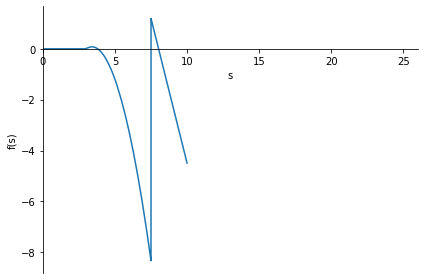

In [170]:
sp.plot(a,xlim = (0,26))

In [169]:
plt.plot([0 0 0 0 0 0 0 0 0 0 0 0 0.0650799145147221 0.0739191985187342
 0.0102941931645176 -0.125795101547928 -0.334348685618602
 -0.615366559047505 -0.968848721834637 -1.39479517398000 -1.89320591548359
 -2.46408094634540 -3.10742026656545 -3.82322387614373 -4.61149177508023
 -5.47222396337496 -6.40542044102792 -7.41108120803912 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0])

SyntaxError: invalid syntax (Temp/ipykernel_16404/1842732193.py, line 1)

In [172]:
for i in range(5):
    print(i)

0
1
2
3
4


In [183]:
cum_lenghts = np.array([1,2,3])
np.insert(cum_lenghts,0,0.0)

array([0, 1, 2, 3])